### 1. Preprocess the data such as highly-variable gene filtering

See https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html for preprocessing

Use dandelion/dandelion/preprocessing/external/_preprocessing.py/recipe_scannpy_qc function to do preprocessing

<span style="color:yellow">**Attemp 1:**</span> filter multiple AnnData objects from dataset

In [1]:
# Environment set-up
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as anndata
import scipy as scipy
import seaborn as sbn
import matplotlib.pyplot as plt
from dandelion.preprocessing.external._preprocessing import recipe_scanpy_qc

import warnings
warnings.filterwarnings("ignore")

In [6]:
from pathlib import Path

dataset_directory = Path('/QRISdata/Q6104/Xiaohan/2_AnnData_objs/GSE132509')

# Use a dictionary to store AnnData objects (Key: sample_name, Value: filtered_anndata)
adatas = {} 

for adata_path in dataset_directory.iterdir():
    if "_uni.h5ad" in adata_path.name:
        adata = anndata.read_h5ad(adata_path)
        adata.raw = adata
        print(adata_path.stem)

        # Do QC and filtering
        recipe_scanpy_qc(adata)
        adata = adata[adata.obs.filter_rna == 'False', :]

        # Do normalization
        sc.pp.normalize_total(adata)

        # Do the log transformation
        sc.pp.log1p(adata)

        # Select highky-variable genes
        sc.pp.highly_variable_genes(
            adata,
            flavor="seurat_v3",
            n_top_genes=2000,
            batch_key="dataset",
            subset=True,
        )

        adatas[adata_path.stem] = adata
        

GSM3872444_PBMMC_3_uni
GSM3872442_PBMMC_1_uni
GSM3872441_PRE-T_2_uni
GSM3872443_PBMMC_2_uni
GSM3872437_ETV6-RUNX1_4_uni
GSM3872438_HHD_1_uni
GSM3872439_HHD_2_uni
GSM3872435_ETV6-RUNX1_2_uni
GSM3872434_ETV6-RUNX1_1_uni
GSM3872440_PRE-T_1_uni
GSM3872436_ETV6-RUNX1_3_uni


In [12]:
# Obtain the anndata objs list
adatas_list = [adata for adata in adatas.values()]

[AnnData object with n_obs × n_vars = 1741 × 2000
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna'
    var: 'gene_ids', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'log1p', 'hvg', AnnData object with n_obs × n_vars = 1242 × 2000
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna'
    var: 'gene_ids', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'log1p', 'hvg', AnnData object with n_obs × n_vars = 1053 × 2000
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'n_genes', 'n_genes_by_counts', 'total_c

### 2. Integration with Scanorama

See https://github.com/brianhie/scanorama for more info

In [15]:
import scanorama
corrected = scanorama.correct_scanpy(adatas_list, return_dimred=True)

Found 65 genes among all datasets
[[0.         0.80354267 0.11257898 0.54049397 0.25215393 0.24296381
  0.03733487 0.23090178 0.02354968 0.03848363 0.09615385]
 [0.         0.         0.05394525 0.50241546 0.22624799 0.46457327
  0.01127214 0.12318841 0.05877617 0.04267311 0.09017713]
 [0.         0.         0.         0.10636277 0.00664767 0.02849003
  0.03608737 0.0322887  0.01614435 0.51661918 0.02173913]
 [0.         0.         0.         0.         0.40425532 0.21045328
  0.01618871 0.08556892 0.03561517 0.03700278 0.16049954]
 [0.         0.         0.         0.         0.         0.29547553
  0.01390645 0.40264963 0.09069307 0.00663781 0.51421405]
 [0.         0.         0.         0.         0.         0.
  0.61862621 0.29239766 0.23730379 0.0378578  0.17558528]
 [0.         0.         0.         0.         0.         0.
  0.         0.2583228  0.08765276 0.00337126 0.0326087 ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.69227723 0.015

In [17]:
corrected

[AnnData object with n_obs × n_vars = 1741 × 65
     obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna'
     var: 'gene_ids', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
     uns: 'log1p', 'hvg'
     obsm: 'X_scanorama',
 AnnData object with n_obs × n_vars = 1242 × 65
     obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna'
     var: 'gene_ids', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
     uns: 'log1p', 'hvg'
     obsm: 'X_scanorama',
 AnnData object with n_obs × n_vars = 1053 × 65
     obs: 'cancer_type', 'dataset', 'tissue', 'u

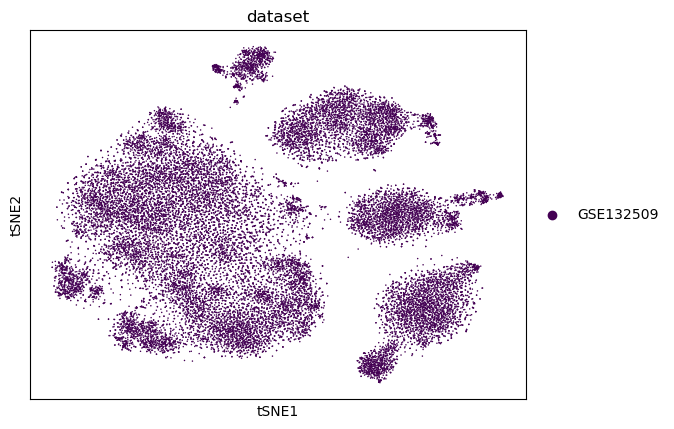

In [19]:
# Concatenate the integrated AnnData objects
adata_integrated = sc.AnnData.concatenate(*corrected)

# Run t-SNE on the integrated embeddings
sc.tl.tsne(adata_integrated, use_rep='X_scanorama')

# Visualize t-SNE embeddings
sc.pl.tsne(adata_integrated, color='dataset', palette='viridis')

### 3. Attempt to integrate two datasets

In [21]:
from pathlib import Path
from itertools import chain

GSE132509_directory = Path('/QRISdata/Q6104/Xiaohan/2_AnnData_objs/GSE132509')
GSE236351_directory = Path('/QRISdata/Q6104/Xiaohan/2_AnnData_objs/GSE236351')

combined_dirs = chain(GSE132509_directory.iterdir(), GSE236351_directory.iterdir())

# Use a dictionary to store AnnData objects (Key: sample_name, Value: filtered_anndata)
adatas = {} 

for adata_path in combined_dirs:
    if "_uni.h5ad" in adata_path.name:
        adata = anndata.read_h5ad(adata_path)
        adata.raw = adata
        print(adata_path.stem)

        # Do QC and filtering
        recipe_scanpy_qc(adata)
        adata = adata[adata.obs.filter_rna == 'False', :]

        # Do normalization
        sc.pp.normalize_total(adata)

        # Do the log transformation
        sc.pp.log1p(adata)

        # Select highky-variable genes
        sc.pp.highly_variable_genes(
            adata,
            flavor="seurat_v3",
            n_top_genes=2000,
            batch_key="dataset",
            subset=True,
        )

        adatas[adata_path.stem] = adata

GSM3872444_PBMMC_3_uni
GSM3872442_PBMMC_1_uni
GSM3872441_PRE-T_2_uni
GSM3872443_PBMMC_2_uni
GSM3872437_ETV6-RUNX1_4_uni
GSM3872438_HHD_1_uni
GSM3872439_HHD_2_uni
GSM3872435_ETV6-RUNX1_2_uni
GSM3872434_ETV6-RUNX1_1_uni
GSM3872440_PRE-T_1_uni
GSM3872436_ETV6-RUNX1_3_uni
GSM7528330_M6_uni
GSM7528331_M7_uni
GSM7528326_M2_uni
GSM7528328_M4_uni
GSM7528329_M5_uni
GSM7528327_M3_uni
GSM7528325_M1_uni


In [23]:
# Obtain the anndata objs list
adatas_list = [adata for adata in adatas.values()]
print(len(adatas_list))

18


In [24]:
# Do the integration

import scanorama
corrected = scanorama.correct_scanpy(adatas_list, return_dimred=True)

Found 25 genes among all datasets
[[0.         0.63204509 0.16809117 0.49074931 0.23262493 0.26019529
  0.12178677 0.24124067 0.02970297 0.0493969  0.12876254 0.2511811
  0.19184377 0.27398047 0.05456634 0.21183673 0.171166   0.04078116]
 [0.         0.         0.10731244 0.3115942  0.34219002 0.48953301
  0.03703704 0.28341385 0.10653465 0.15378422 0.14573269 0.39694042
  0.37198068 0.50080515 0.14412238 0.19162641 0.17713366 0.11674718]
 [0.         0.         0.         0.18233618 0.0294397  0.11490978
  0.04368471 0.03703704 0.01424501 0.43683589 0.02089269 0.1642925
  0.0674264  0.48622982 0.33903134 0.06552707 0.04843305 0.02564103]
 [0.         0.         0.         0.         0.49768733 0.12210916
  0.01711378 0.0693802  0.01803885 0.04210941 0.24884366 0.18110236
  0.06984274 0.08279371 0.06152513 0.04856614 0.05246035 0.00323774]
 [0.         0.         0.         0.         0.         0.25607879
  0.05731142 0.476934   0.24237624 0.00663781 0.61956522 0.1
  0.08023088 0.0464

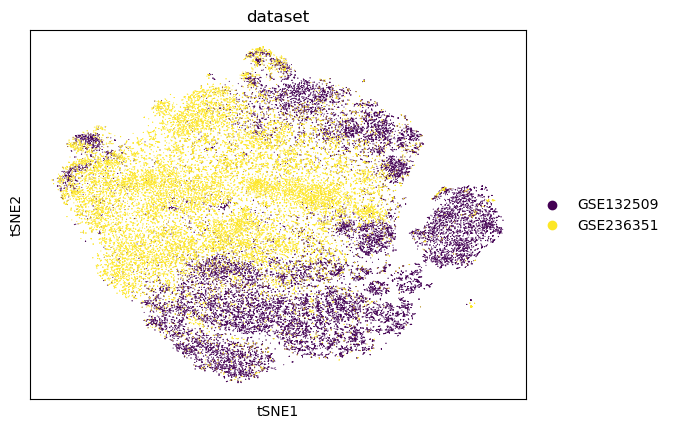

In [25]:
# Concatenate the integrated AnnData objects
adata_integrated = sc.AnnData.concatenate(*corrected)

# Run t-SNE on the integrated embeddings
sc.tl.tsne(adata_integrated, use_rep='X_scanorama')

# Visualize t-SNE embeddings
sc.pl.tsne(adata_integrated, color='dataset', palette='viridis')

### 4. Attempt to integrate three datasets

In [2]:
from pathlib import Path
from itertools import chain

GSE132509_directory = Path('/QRISdata/Q6104/Xiaohan/2_AnnData_objs/GSE132509')
GSE236351_directory = Path('/QRISdata/Q6104/Xiaohan/2_AnnData_objs/GSE236351')
GSE148218_directory = Path('/QRISdata/Q6104/Xiaohan/2_AnnData_objs/GSE148218')


combined_dirs = chain(GSE132509_directory.iterdir(), GSE236351_directory.iterdir(), GSE148218_directory.iterdir())

# Use a dictionary to store AnnData objects (Key: sample_name, Value: filtered_anndata)
adatas = {} 

for adata_path in combined_dirs:
    if "_uni.h5ad" in adata_path.name:
        adata = anndata.read_h5ad(adata_path)
        adata.raw = adata
        print(adata_path.stem)

        # Do QC and filtering
        recipe_scanpy_qc(adata)
        adata = adata[adata.obs.filter_rna == 'False', :]

        # Do normalization
        sc.pp.normalize_total(adata)

        # Do the log transformation
        sc.pp.log1p(adata)

        # Select highky-variable genes
        sc.pp.highly_variable_genes(
            adata,
            flavor="seurat_v3",
            n_top_genes=2000,
            batch_key="dataset",
            subset=True,
        )

        adatas[adata_path.stem] = adata

GSM3872444_PBMMC_3_uni
GSM3872442_PBMMC_1_uni
GSM3872441_PRE-T_2_uni
GSM3872443_PBMMC_2_uni
GSM3872437_ETV6-RUNX1_4_uni
GSM3872438_HHD_1_uni
GSM3872439_HHD_2_uni
GSM3872435_ETV6-RUNX1_2_uni
GSM3872434_ETV6-RUNX1_1_uni
GSM3872440_PRE-T_1_uni
GSM3872436_ETV6-RUNX1_3_uni
GSM7528330_M6_uni
GSM7528331_M7_uni
GSM7528326_M2_uni
GSM7528328_M4_uni
GSM7528329_M5_uni
GSM7528327_M3_uni
GSM7528325_M1_uni
GSM4456252_ALL3_uni
GSM4456253_ALL8_uni
GSM4456254_ALL9_uni
GSM4456257_ALL10-d15_uni
GSM4456255_ALL10_uni
GSM4456256_ALL12_uni
GSM4456258_ALL12-d15_uni
GSM4456251_ALL1_uni


In [3]:
import scanorama

# Obtain the anndata objs list
adatas_list = [adata for adata in adatas.values()]
print(len(adatas_list))

# Do the integration
corrected = scanorama.correct_scanpy(adatas_list, return_dimred=True)

26
Found 15 genes among all datasets
[[0.         0.17218543 0.18211921 0.35099338 0.22847682 0.26821192
  0.29470199 0.17549669 0.04304636 0.01324503 0.06291391 0.19536424
  0.38410596 0.17549669 0.07284768 0.48013245 0.18874172 0.13576159
  0.         0.00331126 0.05298013 0.2218543  0.10927152 0.01986755
  0.05298013 0.06953642]
 [0.         0.         0.04911433 0.61030596 0.42834138 0.27455717
  0.02415459 0.11433172 0.05072464 0.10305958 0.18599034 0.3115942
  0.28824477 0.37681159 0.11030596 0.11674718 0.12479871 0.11030596
  0.11953353 0.09903382 0.23832528 0.48550725 0.35990338 0.1610306
  0.14814815 0.45491143]
 [0.         0.         0.         0.2288699  0.04273504 0.07407407
  0.02089269 0.01709402 0.002849   0.37511871 0.01899335 0.15194682
  0.07217474 0.58024691 0.38746439 0.05603039 0.05033238 0.04273504
  0.0058309  0.01709402 0.0617284  0.48433048 0.1377018  0.01139601
  0.01139601 0.1965812 ]
 [0.         0.         0.         0.         0.30434783 0.22525439
  0.04

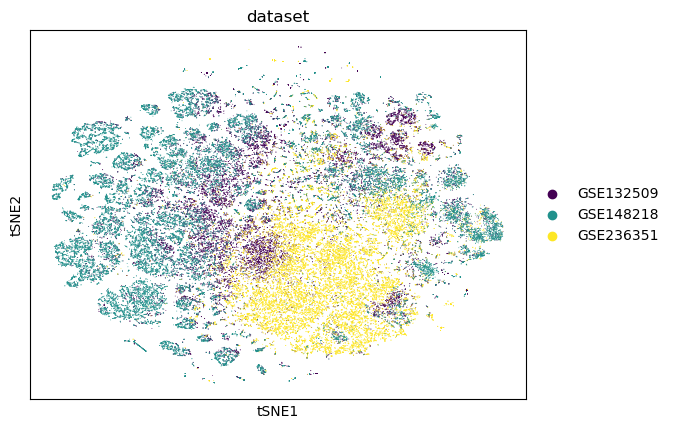

In [28]:
# Concatenate the integrated AnnData objects
adata_integrated = sc.AnnData.concatenate(*corrected)

# # Run t-SNE on the integrated embeddings
# sc.tl.tsne(adata_integrated, use_rep='X_scanorama')

# # Visualize t-SNE embeddings
# sc.pl.tsne(adata_integrated, color='dataset', palette='viridis')

In [4]:
# Concatenate the integrated AnnData objects
adata_integrated = sc.AnnData.concatenate(*corrected)

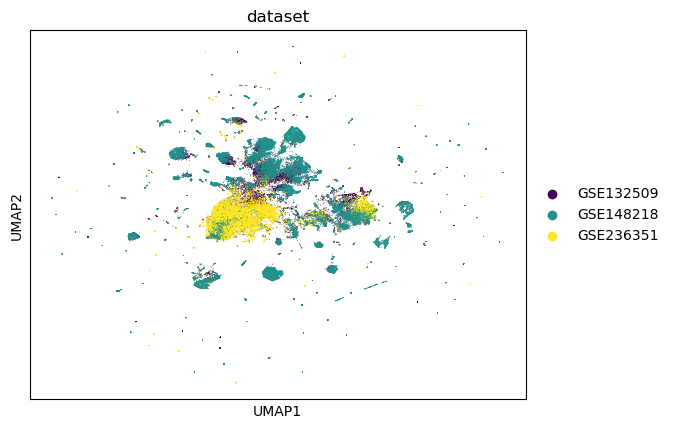

In [6]:
import umap

# Run UMAP on the integrated embeddings
umap_reducer = umap.UMAP()
umap_embeddings = umap_reducer.fit_transform(adata_integrated.obsm['X_scanorama'])

# Update AnnData object with UMAP embeddings
adata_integrated.obsm['X_umap'] = umap_embeddings

# Visualize UMAP embeddings
sc.pl.umap(adata_integrated, color='dataset', palette='viridis')

In [7]:
adata_integrated

AnnData object with n_obs × n_vars = 84367 × 15
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna', 'batch'
    var: 'highly_variable', 'highly_variable_nbatches', 'gene_ids-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'gene_ids-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'gene_ids-10', 'highly_variable_rank-10', 'means-10', 'variances-10', 'variances_norm-10', 'gene_ids-11', 'highly_variable_rank-11', 'means-11', 'variances-11', 'variances_norm-11', 'feature_types-11', 'gene_ids-12', 'highly_variable_rank-12', 'means-12', 'variances-12', 'variances_norm-12', 'feature_types-12', 'gene_ids-13', 'highly_variable_rank-13', 'means-13', 'variances-13', 'variances_norm-13', 'feature_types-13', 'gene_ids-14', 'highly_variable_rank-14', 'means-14', 'variances-14', '